<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2024-2/Sesiones/Sesion_01b_pandas_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# Problema: Dataset de pingüinos:

Carga el sigiuente dataset y responde las siguientes preguntas:

```python
import pandas as pd
import seaborn as sns

# Cargar el dataset
df = sns.load_dataset('penguins')
```


1. ¿Cuántas especies diferentes de pingüinos hay en el dataset?


2. ¿Cuál es la longitud media del pico de los pingüinos de la especie Adelie?

3. ¿Cuál es la masa corporal promedio de los pingüinos de la especie Gentoo?

4. ¿Cuál es la relación entre la longitud del pico y la masa corporal de los pingüinos?

5. ¿Cuál es la isla con mayor número de pingüinos en el dataset?

6. ¿Cuál es la desviación estándar de la longitud de la aleta de los pingüinos de la especie Chinstrap?

7. ¿Qué pingüino tiene el pico más largo en el dataset y cuál es su especie?

8. ¿Cuál es la proporción de machos y hembras en la especie Adelie?

9. ¿Existe una correlación significativa entre la longitud del pico y la masa corporal en las diferentes especies de pingüinos?

10. ¿Cuál es la distribución de la masa corporal entre las especies de pingüinos?

11. ¿Cuál es la longitud mínima y máxima de la aleta entre las tres especies de pingüinos?

12. ¿Cuántos pingüinos tienen una masa corporal superior a 5000 gramos?

13. ¿Cómo varía la longitud del pico entre las diferentes especies de pingüinos en las distintas islas?

14. ¿Cuál es la relación entre la longitud de la aleta y la masa corporal en los pingüinos de la especie Gentoo?

15. ¿Cuántos pingüinos tienen datos faltantes en alguna de sus características?

16. ¿Cuál es la isla con la mayor variación en la longitud del pico entre las tres especies de pingüinos?

17. ¿Cuál es la diferencia en masa corporal promedio entre machos y hembras de la especie Chinstrap?

18. ¿Qué especie de pingüino tiene la longitud de aleta promedio más alta?

19. ¿Cuál es la longitud del pico más pequeña registrada en el dataset y de qué especie es?

20. ¿Cuál es la relación entre el sexo y la longitud de la aleta en los pingüinos de la especie Adelie?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib
import matplotlib.pyplot as plt

# Cargar el dataset
df = sns.load_dataset('penguins')

#estilo graficas
plt.style.use("seaborn")

C:\Users\juliana\AppData\Local\Temp\ipykernel_26932\1654696115.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


### 0. Descartar valores nulos

In [2]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
df.dropna(axis = 0, inplace= True, ignore_index= True)
# Se puede quitar la fila de la columna vacia, o la columna, el default, es quitar la fila.
# la fila a veces se le llama record.
# Inplace True hace que no devuelva nada, pero True hace que modifique el df
# ignore index: default es False, en True va a volver a organizar los indices.

### 1. ¿Cuántas especies de pinguinos hay?


In [5]:
num_especies = len(df.species.unique())

print(f"Hay {num_especies} especies")

Hay 3 especies


### 2. ¿Cuál es la longitud media del pico de los pingüinos de la especie Adelie?


In [6]:
#Serie de las longitudes promedio de los picos por especie.
especies_pico = df.groupby(["species"]).bill_length_mm.mean()

media_pico_adelie = especies_pico.loc["Adelie"]

print(f"La longitud media del pico de los pinguinos Adelie es {np.round(media_pico_adelie, 0)} g")

La longitud media del pico de los pinguinos Adelie es 39.0 g


### 3. ¿Cuál es la masa corporal promedio de los pingüinos de la especie Gentoo?


In [7]:
#Serie de las masas corporales promedio por especie.
especies_masas = df.groupby(["species"]).body_mass_g.mean()

masa_gentoo = especies_masas.loc["Gentoo"]

print(f"La masa corporal media de los pinguinos Gentoo es  {np.round(masa_gentoo, 0)} g")

La masa corporal media de los pinguinos Gentoo es  5092.0 g


### 4.¿Cuál es la relación entre la longitud del pico y la masa corporal de los pingüinos? 



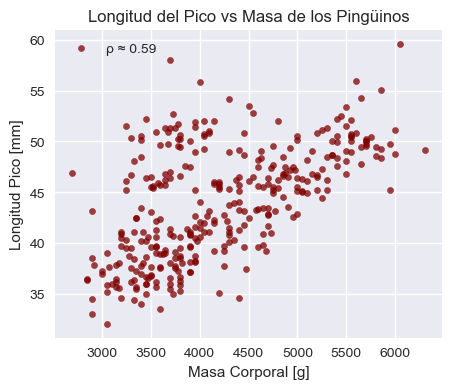

In [9]:
coef_pearson = pearsonr(df.bill_length_mm, df.body_mass_g).statistic

ax = df.plot.scatter(x='body_mass_g', y='bill_length_mm', c='maroon', marker="o", alpha=0.75, 
                    label = f"ρ ≈ {np.round(coef_pearson,2)}", figsize=(5, 4));

ax.set(title="Longitud del Pico vs Masa de los Pingüinos", xlabel="Masa Corporal [g]",
      ylabel="Longitud Pico [mm]")

ax.legend();


In [10]:
print(f"El coeficiente de correlación de pearson entre la lingitud y la masa es \n ρ ≈ {np.round(coef_pearson, 2)}")
print(f"Por lo que puede decirse que la longitud del pico y la masa corporal están linealmente relacionados.")

El coeficiente de correlación de pearson entre la lingitud y la masa es 
 ρ ≈ 0.59
Por lo que puede decirse que la longitud del pico y la masa corporal están linealmente relacionados.


### 5. ¿Cuál es la isla con mayor número de pingüinos en el dataset?


In [11]:
#Serie con el numero de pinguinos en cada isla
pinguinos_islas = df.groupby(["island"]).size()

isla_max_nombre = pinguinos_islas.idxmax() 
isla_max_pinguinos = pinguinos_islas.max()

print(f"La isla con más pinguinos es {isla_max_nombre} con {isla_max_pinguinos} Pinguinos")

La isla con más pinguinos es Biscoe con 163 Pinguinos


### 6. ¿Cuál es la desviación estándar de la longitud de la aleta de los pingüinos de la especie Chinstrap?

In [12]:
especie = "Chinstrap"
media_aleta = df[df["species"] == especie].flipper_length_mm.mean()
desviacion_estandar_aletas =  df[df["species"] == especie].flipper_length_mm.std()
print(f"La longitud media de las aletas de los pinguinos {especie} es: {np.round(media_aleta, 0)} +-{np.round(desviacion_estandar_aletas, 0)}mm")

La longitud media de las aletas de los pinguinos Chinstrap es: 196.0 +-7.0mm


### 7. ¿Qué pingüino tiene el pico más largo en el dataset y cuál es su especie?

In [23]:
pico_max_valor = df.bill_length_mm.max()
pico_max_idx = df.bill_length_mm.idxmax()
pico_max_especie = df.species.iloc[pico_max_idx]


print(f"El pinguino con el pico más largo corresponde al almacenado en la fila: {pico_max_idx}")
print(f"La longitud de su pico es de {pico_max_valor} mm y es de la especie {pico_max_especie}")

El pinguino con el pico más largo corresponde al almacenado en la fila: 246
La longitud de su pico es de 59.6 mm y es de la especie Gentoo


### 8. ¿Cuál es la proporción de machos y hembras en la especie Adelie?

In [25]:
especie = "Adelie"

machos_especie = df[ (df["species"] == especie)  &  (df["sex"] == "Male") ]
num_machos_especie = machos_especie.shape[0]

hembras_especie = df[ (df["species"] == especie)  &  (df["sex"] == "Female") ]
num_hembras_especie = hembras_especie.shape[0]

print(f"De la especie {especie} se tienen {num_machos_especie} machos y {num_hembras_especie} regitradas.")
print(f"Por lo que la proporcion es de {np.round(num_machos_especie/num_hembras_especie, 0)}")

De la especie Adelie se tienen 73 machos y 73 regitradas.
Por lo que la proporcion es de 1.0


### 9. ¿Existe una correlación significativa entre la longitud del pico y la masa corporal en las diferentes especies de pingüinos?


Para hallar si la correlación entre la longitud del pico y la masa corporal en las diferentes especies, se calcula el coeficiente de Pearson junto con el p-value, usando pearsonr() de scipy.stats. Según su documentación, el p-value retornado indica, más o menos, la probabilidad de que un sistema no correlacionado produzca un conjunto de datos que tenga un coeficiente de correlación de Pearson casi tan extremo como el obtenido en el conjunto de datos.

Para la especie Adelie:
ρ ≈ 0.5442764102182449 con un p-value ≈ 1.2419179713063676e-12
Para la especie Chinstrap:
ρ ≈ 0.5136383479489104 con un p-value ≈ 7.480491991584471e-06
Para la especie Gentoo:
ρ ≈ 0.6667302222195615 con un p-value ≈ 1.2624180880763871e-16


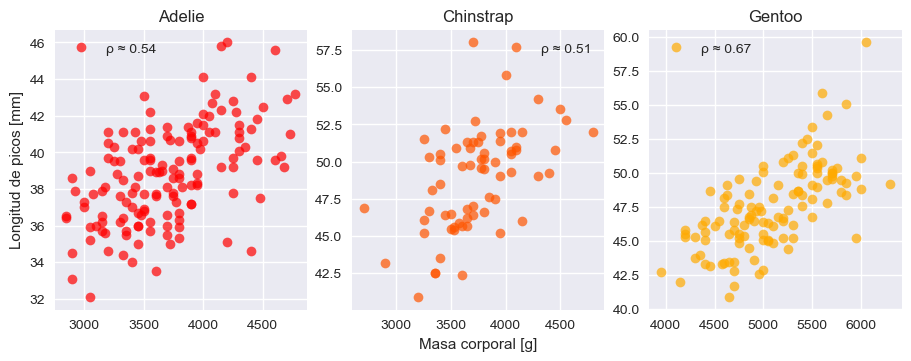

In [13]:
#Grafica la masa vs la logitud del pico por especie de pinguino.
especies = df.species.unique() 
num_especies = len(especies)

fig, ax = plt.subplots(1, 3, figsize=(9, 3.5) , layout= 'constrained')

#imprime los titulos de los ejes
ax[0].set_ylabel("Longitud de picos [mm]")
ax[1].set_xlabel("Masa corporal [g]")

#Define la paleta de colores
cmap = matplotlib.colormaps['autumn']

#Para cada especie hace un grafico diferente
for i in range(num_especies):
    
    especie = especies[i]
    
    df_especie = df.groupby(["species"]).get_group(especie)
 
    coef_pearson = pearsonr(df_especie.bill_length_mm, df_especie.body_mass_g).statistic
    p_value = pearsonr(df_especie.bill_length_mm, df_especie.body_mass_g).pvalue
    
    print(f"Para la especie {especie}:")
    print(f"ρ ≈ {coef_pearson} con un p-value ≈ {p_value}")
    
    color = cmap(i/num_especies) #color de la gráfica
    
    ax[i].plot(df_especie.body_mass_g, df_especie.bill_length_mm ,
               marker="o", linestyle=" ", color = color, alpha = 0.7,
               label=f"ρ ≈ {np.round(coef_pearson,2)}")
    
    ax[i].legend()
   
    
    ax[i].set(title= f"{especies[i]}")

Como los valores encontrados para el valor de p asociados al coeficiente de correlacion de person, son muy pequeños, se concluye que **Sí existe una correlación significativa en los datos**

### 10.¿Cuál es la distribución de la masa corporal entre las especies de pingüinos?


[Text(0.5, 1.0, 'Gentoo'), Text(0, 0.5, ''), Text(0.5, 0, '')]

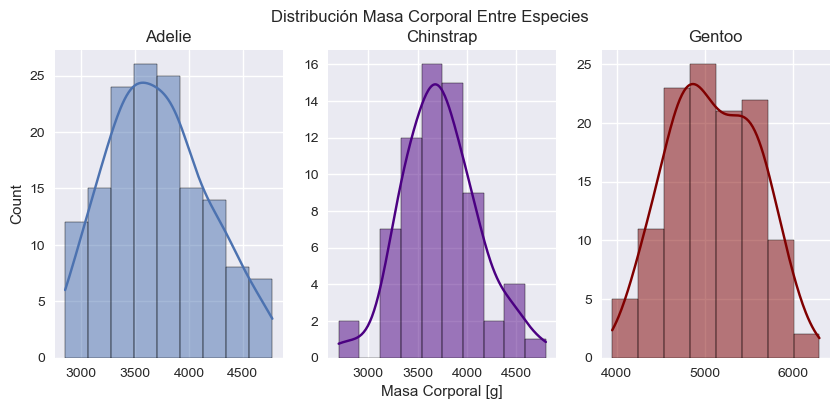

In [14]:
#Serie de las longitudes promedio de los picos por especie.
df_especies = df.groupby(["species"])

fig, ax = plt.subplots(1, 3, figsize=(10, 4))
fig.suptitle("Distribución Masa Corporal Entre Especies")

#Hace el histograma con seaborn porque es más bonito que el de pandas
sns.histplot(df_especies.get_group("Adelie").body_mass_g, 
                     kde= True, stat = 'count', ax=ax[0])
ax[0].set(title="Adelie", xlabel="")


sns.histplot(df_especies.get_group("Chinstrap").body_mass_g, 
                     kde= True, stat = 'count', 
                     ax=ax[1], color="indigo")

ax[1].set(title="Chinstrap", ylabel="", xlabel="Masa Corporal [g]")


sns.histplot(df_especies.get_group("Gentoo").body_mass_g, 
                     kde= True, stat = 'count', 
                     ax=ax[2], color="maroon")
ax[2].set(title="Gentoo", ylabel="", xlabel="")


De los histogramas, puede pensarse que la distribución de los pingüinos Adelie se asemeja a una normal, porque es unimodal y simétrica. Lo mismo ocurre con los pingüinos Chinstrap, pero no se puede decir lo mismo de los Gentoo, ya que su distribución tiene dos picos.

### 11. ¿Cuál es la longitud mínima y máxima de la aleta entre las tres especies de pingüinos?

In [15]:
df_especies = df.groupby(by=["species"]) 

#serie con los valores máximos de la longitud del pico por especie.
aletas_max = df_especies.max(numeric_only=True).flipper_length_mm.rename("max_flipper_length_mm") 

#serie con los valores mínimos de la longitud del pico por especie.
aletas_min = df_especies.min(numeric_only=True).flipper_length_mm.rename("min_flipper_length_mm") 

# Imprime el resultado en una tabla
aletas_max_min = pd.DataFrame([aletas_max, aletas_min]).transpose()
aletas_max_min 

,max_flipper_length_mm,min_flipper_length_mm
species,,
Adelie,210.0,172.0
Chinstrap,212.0,178.0
Gentoo,231.0,203.0


### 12. ¿Cuántos pingüinos tienen una masa corporal superior a 5000 gramos?

In [16]:
num_pinguinos_masa_sup = df[ df["body_mass_g"] > 5000].shape[0]
print(f"El número de pinguinos con masa corporal superior a 500 g es {num_pinguinos_masa_sup}")

El número de pinguinos con masa corporal superior a 500 g es 61


### 13. ¿Cómo varía la longitud del pico entre las diferentes especies de pingüinos en las distintas islas?

In [17]:
#DataFrame con los valores de la desviación estandar de las variables númericas por especie
#indices son las especies, y las columnas son las variables numericas
df_especies_std = df.groupby(by=["species"]).std(numeric_only=True)
print(f"Desviaciones Estandar")
print(df_especies_std.bill_length_mm)

Desviaciones Estandar
species
Adelie       2.662597
Chinstrap    3.339256
Gentoo       3.106116
Name: bill_length_mm, dtype: float64


### 14. ¿Cuál es la relación entre la longitud de la aleta y la masa corporal en los pingüinos de la especie Gentoo?

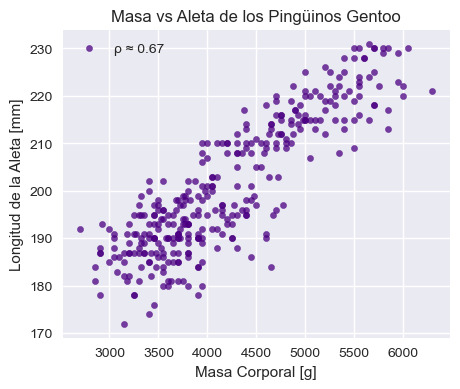

In [18]:
df_gentoo = df[ df["species"]  == "Gentoo"]

coef_pearson_aleta_masa = pearsonr(df_gentoo.bill_length_mm, df_gentoo.body_mass_g).statistic

ax = df.plot.scatter(x='body_mass_g', y='flipper_length_mm', c='indigo', marker="o", alpha=0.75, 
                    label = f"ρ ≈ {np.round(coef_pearson_aleta_masa,2)}", figsize=(5, 4));

ax.set(title= "Masa vs Aleta de los Pingüinos Gentoo", xlabel="Masa Corporal [g]",
      ylabel="Longitud de la Aleta [mm]")

ax.legend();


In [19]:
print(f"El coeficiente de correlación de pearson entre la aleta y la masa es \n ρ ≈ {np.round(coef_pearson_aleta_masa, 2)}")
print(f"Por lo que puede decirse que la longitud de la Aleta y la masa corporal están linealmente relacionados.")

El coeficiente de correlación de pearson entre la aleta y la masa es 
 ρ ≈ 0.67
Por lo que puede decirse que la longitud de la Aleta y la masa corporal están linealmente relacionados.


### 15. ¿Cuántos pingüinos tienen datos faltantes en alguna de sus características?

In [20]:
df_original =  sns.load_dataset('penguins')

#isna() reemplaza cada valor del data frame por un booleano, True is la entrada es NAN, False de lo contrario.
#El parametro axis=1 hace que any le asigne a cada fila el un valor booleano.
#En este caso sum() cuenta los valores True
num_pinguinos_NAN = df_original.isna().any(axis=1).sum()

print(f"El número de pinguinos con por lo menos una caracteristica faltante es {num_pinguinos_NAN}")

El número de pinguinos con por lo menos una caracteristica faltante es 11


### 16. ¿Cuál es la isla con la mayor variación en la longitud del pico entre las tres especies de pingüinos?

In [21]:
#DataFrame con los valores de la desviación estandar de las variables númericas por isla
df_isla_std = df.groupby(by=["island"]).std(numeric_only=True)
isla_std_max = df_isla_std.bill_length_mm.idxmax()

print(f"Desviaciones Estandar")
print(df_isla_std.bill_length_mm)

print(f"\nLa isla con la mayor desciación estandar el la longitud de los picos es : {isla_std_max}")


Desviaciones Estandar
island
Biscoe       4.827319
Dream        5.947069
Torgersen    3.028097
Name: bill_length_mm, dtype: float64

La isla con la mayor desciación estandar el la longitud de los picos es : Dream


### 17. ¿Cuál es la diferencia en masa corporal promedio entre machos y hembras de la especie Chinstrap?

In [22]:
especie = "Chinstrap"

machos_masa_media = df[ (df["species"] == "Adelie")&(df["sex"] == "Male") ].body_mass_g.mean()

hembras_masa_media = df[ (df["species"] == "Adelie")  &  (df["sex"] == "Female") ].body_mass_g.mean()

diferencia_masa_sexos = machos_masa_media - hembras_masa_media

print(f"La diferencia entre las masas corporales promedio de los sexos de la especie {especie} es aproximadamente {np.round(diferencia_masa_sexos, 2)} g")

La diferencia entre las masas corporales promedio de los sexos de la especie Chinstrap es aproximadamente 674.66 g


### 18. ¿Qué especie de pingüino tiene la longitud de aleta promedio más alta?

In [23]:
#DataFrame con los valores promedio de las variables númericas por especie
#indices son las especies, y las columnas son las variables numericas
df_especies_medias = df.groupby(by=["species"]).mean(numeric_only=True)


#idx.max() retorna el indice del valor máximo
especie_promedio_aleta_max = df_especies_medias.flipper_length_mm.idxmax()

print(f"La especie de pinguino con la longitud de aleta promedio más alta es la {especie_promedio_aleta_max}")

La especie de pinguino con la longitud de aleta promedio más alta es la Gentoo


### 19. ¿Cuál es la longitud del pico más pequeña registrada en el dataset y de qué especie es?

In [24]:
pico_min_valor = df.bill_length_mm.min()
pico_min_idx = df.bill_length_mm.idxmin()
pico_min_especie = df.species.iloc[pico_min_idx]

print(f"La longitud del pico más pequeña es {pico_min_valor} mm y es de la especie {pico_min_especie}")

La longitud del pico más pequeña es 32.1 mm y es de la especie Adelie


### 20. ¿Cuál es la relación entre el sexo y la longitud de la aleta en los pingüinos de la especie Adelie?


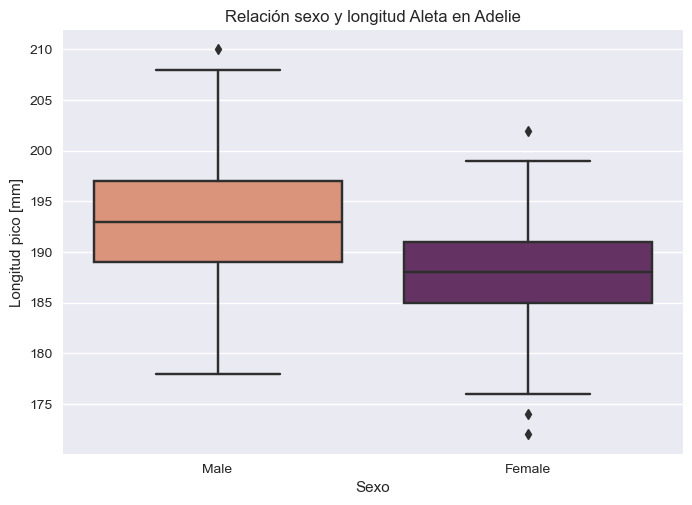

In [25]:
df_Adelie = df[df["species"] == "Adelie"]

#hace la figura
fig, ax = plt.subplots()

colors = sns.color_palette("flare")[0], sns.color_palette("flare")[-1];

sns.boxplot(data=df_Adelie, x="sex", y="flipper_length_mm", palette = colors, ax=ax);

ax.set(xlabel = "Sexo", ylabel="Longitud pico [mm]", title="Relación sexo y longitud Aleta en Adelie");

Obvaervando la gráfica,se puede decir que los machos suelen tener picos más grandes que las hembras.